In [ ]:
pip install praw

     |████████████████████████████████| 163kB 6.6MB/s 
     |████████████████████████████████| 61kB 5.2MB/s 


In [ ]:
import praw
import string
import pandas as pd
pd.options.display.max_colwidth = 100
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 8)
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
#Authorized Reddit Instance
reddit = praw.Reddit(client_id ='-------', 
                     client_secret ='---------', 
                     user_agent ='------------',
                     username = '----------',
                     password = '--------')

In [ ]:
#Obtaining a Subreddit Instance
subreddit = reddit.subreddit('unpopularopinion')

In [ ]:
# display the subreddit name 
print(subreddit.display_name) 
  
# display the subreddit title  
print(subreddit.title)        
  
# display the subreddit description  
print(subreddit.description)

In [ ]:
#Obtaining submissions(posts) from subreddit
#In this case, we obtain top 200 upvoted posts from this year and appending their information to a list.
submissions = []
for submission in subreddit.top('year', limit = 20):
    s = [submission.id, submission.title, submission.selftext, submission.score, submission.num_comments, submission.shortlink]
    submissions.append(s)

In [ ]:
#Submissions list shown with pandas data frame
df = pd.DataFrame(submissions)
df.columns=["id", "title", "selftext", "score", "num_comments", "shortlink"]
df

,id,title,selftext,score,num_comments,shortlink
0,hrivbj,"If Will Smith had cheated on Jada the internet would crucify him, but since it was the other way...",It is disgusting. If Will had cheated on Jada the entire internet would turn on him and crucify ...,118292,5480,https://redd.it/hrivbj
1,i2i2zd,"Amazon could really use a ""filter out Chinese sellers"" option",It is so frustrating to shop on Amazon with the Chinese sellers and manufacturers on the site.\n...,98077,4033,https://redd.it/i2i2zd
2,gjagrw,Sleeping in your car should be completely legal and never looked down upon.,I don’t understand why it’s illegal in some places and under many circumstances to sleep in your...,91399,3982,https://redd.it/gjagrw
3,id94u6,I highly respect millennials that walk out of jobs or any inconvenience in life,As a man in my late 50s I wish I had the halls to walk off a job when I was younger. After start...,86761,4747,https://redd.it/id94u6
4,i2s4hp,"It doesn't matter how much you like his music, Tekashi 69 slept with a 13 year old and by listen...",No music is worth actively giving a rapist money no matter how much you like his songs. I can't ...,78261,6646,https://redd.it/i2s4hp
5,i36whz,"All posts about pedophiles will result in an ban. Reposting ""Pedophilia is a sexuality"" will res...",Both of these are being reposted every 10 minutes. You will stop or we'll all carry on without y...,77626,5149,https://redd.it/i36whz
6,ihc0x6,I’m so fucking tired of being forced to care about everything all at once,I’m just one guy. I try to be a good person; I try to treat everyone equally; I try to be kind a...,77443,5009,https://redd.it/ihc0x6
7,gwiz10,The fact that no media outlet is covering David Dorns death is sad,"He was a black, retied police chief who was murdered in the protests after he tried to defend a ...",77019,5515,https://redd.it/gwiz10
8,iakmvi,"Middle aged guys don't buy sports cars because they're having a ""mid-life crisis,"" it's because ...","I hate hearing people say, ""oh, he bought a Corvette because he's balding and needs to feel youn...",75459,2492,https://redd.it/iakmvi
9,hx097d,"Nobody should have to work 1/3rd of their lives, for over 40 years, to retire at ~60 just to fin...",As of right now I am 18 years old and looking into the future is depressing. I figure I’m gonna ...,73835,10206,https://redd.it/hx097d


In [ ]:
#HOT POSTS RIGHT NOW
submissions = []
for submission in subreddit.hot(limit = 200):
    s = [submission.id, submission.title, submission.selftext, submission.score, submission.num_comments, submission.shortlink]
    submissions.append(s)
df = pd.DataFrame(submissions)
df.columns=["id", "title", "selftext", "score", "num_comments", "shortlink"]
df

In [ ]:
sentiments = []
for index, row in df.iterrows():
    #blob = TextBlob(row['title'], analyzer=NaiveBayesAnalyzer())
    blob = TextBlob(row['title'])
    analysis = blob.sentiment
    #comment_sentiment = blob.sentiment.polarity
    #print(row['title'] + ': ' + str(blob.sentiment.polarity))
    sentiments.append([analysis.polarity, analysis.subjectivity])
    print(row['title'])
    print(analysis)
    print("----------")

In [ ]:
sentiments_df = pd.DataFrame(sentiments)
sentiments_df.columns=["polarity", "subjectivity"]
sentiments_df

,polarity,subjectivity
0,0.125000,0.200000
1,0.600000,0.900000
2,0.000000,0.100000
3,0.357143,0.571429
4,-0.500000,0.500000
...,...,...
195,0.262500,0.500000
196,-0.350000,0.333333
197,-0.095000,0.458750
198,0.300000,0.366667


In [ ]:
new_df = pd.concat([df,sentiments_df], axis=1)
classifications = []
for index, row in new_df.iterrows():
    if row['polarity'] < 0.0: classifications.append(['negative'])
    elif row['polarity'] > 0.0: classifications.append(['positive'])
    else: classifications.append(['neutral'])
classifications_df = pd.DataFrame(classifications)
classifications_df.columns =["classification"]
new_df = pd.concat([new_df, classifications_df], axis=1)
new_df

,id,title,selftext,score,num_comments,shortlink,polarity,subjectivity,classification
0,mzi45q,Please don’t make another “Name” war. The Josh battle should be our first and last.,"Seriously. The Josh battle was funny. However, copying the original Josh war by scheduling a Nat...",28238,1104,https://redd.it/mzi45q,0.125000,0.200000,positive
1,n06kub,Popular Topics Mega-Hub,"Greetings, you opinionated, unpopular lot! This is your one-stop shop for all of the ridiculousl...",21,0,https://redd.it/n06kub,0.600000,0.900000,positive
2,n188ug,We need to stop pretending that degrees actually help people prepare for careers,The over importance of a degree in recruiting is far beyond the pale. There is a major unspoken ...,4159,653,https://redd.it/n188ug,0.000000,0.100000,neutral
3,n13j6j,Judging people by how they look is smart and a safe way of living,"Now I'm not talking like a basic color of their skin, I'm talking how they dress, any sort of ma...",11885,1275,https://redd.it/n13j6j,0.357143,0.571429,positive
4,n1478b,Spotify ads with vehicle sounds should be illegal,"Why is it that every single time I’m driving, I get that Wendy’s Spotify ad that has the sound o...",6846,285,https://redd.it/n1478b,-0.500000,0.500000,negative
...,...,...,...,...,...,...,...,...,...
195,n113gp,Big noses are more attractive on women than small noses,I am a guy with a small kinda short nose. It wasn't untill recently were I realized that I reall...,17,13,https://redd.it/n113gp,0.262500,0.500000,positive
196,n19ghc,Any product that covers bad smells is gross.,"If a person/place/thing smells bad, I want to know so that I can avoid it. Noses are highly sens...",4,9,https://redd.it/n19ghc,-0.350000,0.333333,negative
197,n110oy,I prefer very runny milkshakes over very thick ones.,"Everytime I tell someone this I get ridiculed beyond belief, thus putting me into a self conscio...",16,13,https://redd.it/n110oy,-0.095000,0.458750,negative
198,n0t604,"I'm not against military spending, and many people who are don't appreciate how safe their count...","There's a lot of anti-military sentiments in America right now, and heavy criticism goes to the ...",81,129,https://redd.it/n0t604,0.300000,0.366667,positive


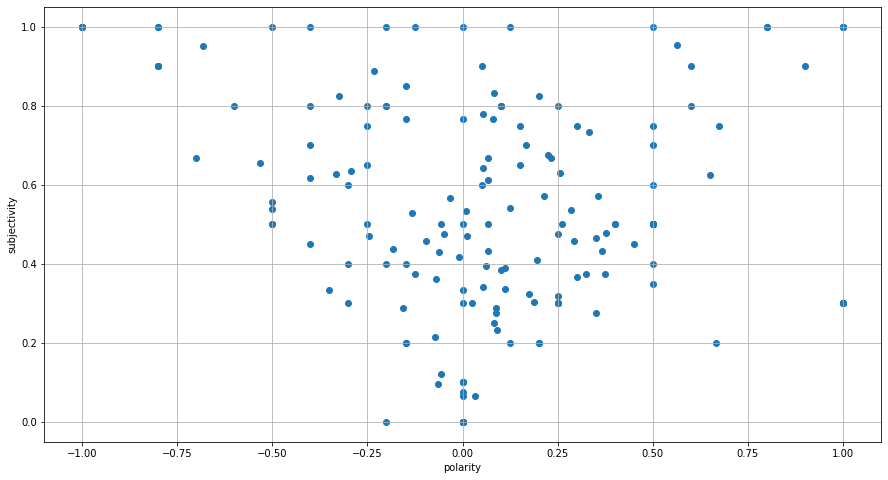

In [ ]:
plt.scatter(new_df['polarity'], new_df['subjectivity'])
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.grid()
plt.show()

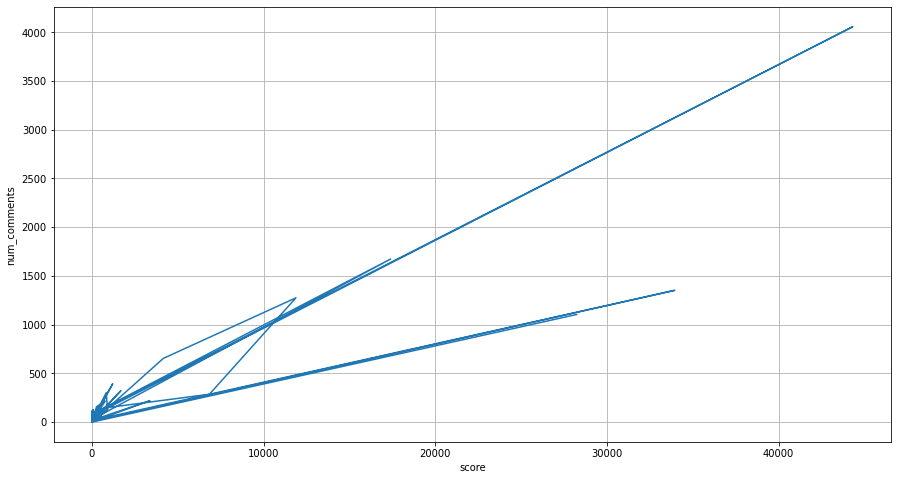

In [ ]:
plt.plot(new_df['score'], new_df['num_comments'])
plt.xlabel('score')
plt.ylabel('num_comments')
plt.grid()
plt.show()

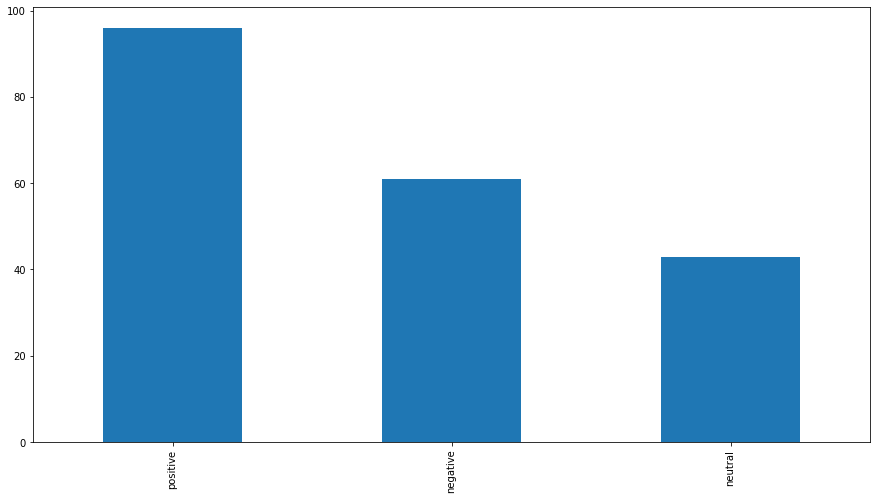

In [ ]:
new_df['classification'].value_counts().plot(kind='bar')

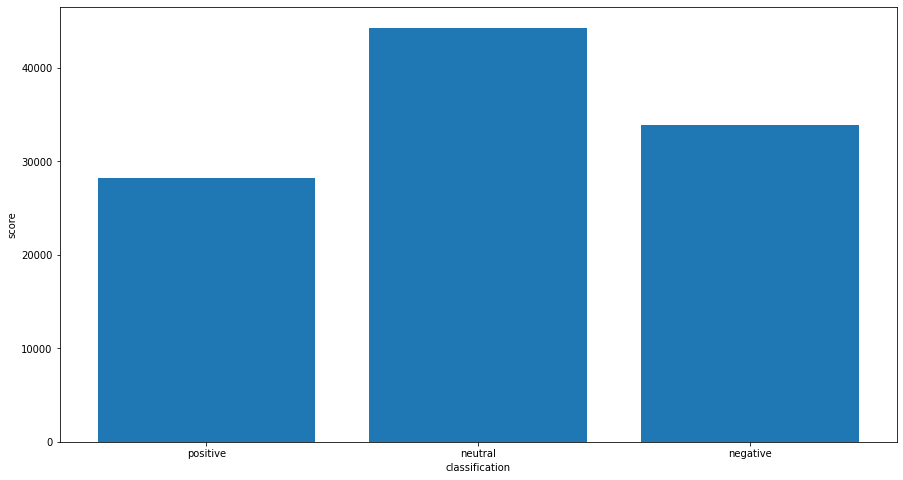

In [ ]:
plt.bar(new_df['classification'], new_df['score'])
plt.xlabel('classification')
plt.ylabel('score')
plt.show()